<h2>Phase one Update </h2> 
<h3>Converting Clustering to Classification</h3>

 **importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC , SVC
from sklearn.metrics import mean_squared_error

In [2]:
#Read dataset
dataset=pd.read_json("finalCleanedData.csv")
dataset.head()

,BookTitle,Author,BookSummary,Class,Language,Pages,publisher,BookSize,format,DownloadURL,PageURL
0,التضحية عند الحيوان,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...","[الأدب العربي, متنوعة]",اللغة العربية,160 صفحة,عدنان أوكطار,5 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
1,معجزة الذرة,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...","[تطوير الذات, متنوعة]",اللغة العربية,136 صفحة,عدنان أوكطار,3.41 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
2,لا تتجاهل,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...",[الأدب العربي],اللغة العربية,100 صفحة,عدنان أوكطار,3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
3,الحياة في سبيل الله,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...",[اسلامية],اللغة العربية,100 صفحة,عدنان أوكطار,2.11 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
4,العظمة في كل مكان,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...",[الأدب العربي],اللغة العربية,140 صفحة,عدنان أوكطار,5.3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...


In [3]:
#convert list to string in BookSummary
dataset["BookSummary"]=dataset["BookSummary"].apply(lambda row: ' '.join(row))
dataset.head()

,BookTitle,Author,BookSummary,Class,Language,Pages,publisher,BookSize,format,DownloadURL,PageURL
0,التضحية عند الحيوان,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,"[الأدب العربي, متنوعة]",اللغة العربية,160 صفحة,عدنان أوكطار,5 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
1,معجزة الذرة,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,"[تطوير الذات, متنوعة]",اللغة العربية,136 صفحة,عدنان أوكطار,3.41 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
2,لا تتجاهل,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,[الأدب العربي],اللغة العربية,100 صفحة,عدنان أوكطار,3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
3,الحياة في سبيل الله,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,[اسلامية],اللغة العربية,100 صفحة,عدنان أوكطار,2.11 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
4,العظمة في كل مكان,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,[الأدب العربي],اللغة العربية,140 صفحة,عدنان أوكطار,5.3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...


In [4]:
#convert list to string in Author and Class columns
dataset["Author"]=dataset["Author"].apply(lambda row: '-'.join(row))
dataset["Class"]=dataset["Class"].apply(lambda row: '-'.join(row))
dataset.head()

,BookTitle,Author,BookSummary,Class,Language,Pages,publisher,BookSize,format,DownloadURL,PageURL
0,التضحية عند الحيوان,هارون يحيى,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,الأدب العربي-متنوعة,اللغة العربية,160 صفحة,عدنان أوكطار,5 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
1,معجزة الذرة,هارون يحيى,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,تطوير الذات-متنوعة,اللغة العربية,136 صفحة,عدنان أوكطار,3.41 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
2,لا تتجاهل,هارون يحيى,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,الأدب العربي,اللغة العربية,100 صفحة,عدنان أوكطار,3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
3,الحياة في سبيل الله,هارون يحيى,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,اسلامية,اللغة العربية,100 صفحة,عدنان أوكطار,2.11 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
4,العظمة في كل مكان,هارون يحيى,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,الأدب العربي,اللغة العربية,140 صفحة,عدنان أوكطار,5.3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...


In [5]:
print("the number od unique on Author column : ",len(dataset["Author"].unique()))
print ("the number od unique on Class column : ",len(dataset["Class"].unique()))

the number od unique on Author column :  581
the number od unique on Class column :  267


In [6]:
#takeing Important columns 
Dataset = dataset[["BookTitle","BookSummary","Author","Class"]]

In [7]:
Dataset.head()

,BookTitle,BookSummary,Author,Class
0,التضحية عند الحيوان,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,الأدب العربي-متنوعة
1,معجزة الذرة,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,تطوير الذات-متنوعة
2,لا تتجاهل,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,الأدب العربي
3,الحياة في سبيل الله,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,اسلامية
4,العظمة في كل مكان,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,الأدب العربي


<h3>Label Encoding (Author - class)</h3> 

In [8]:
#label Encoding on Author for first classification 
Dataset.insert(3,"Author_encode", LabelEncoder().fit_transform(Dataset["Author"].values), True)
#label Encoding on class for first classification 
Dataset.insert(5,"Class_encode", LabelEncoder().fit_transform(Dataset["Class"].values), True)

In [9]:
Dataset.head()

,BookTitle,BookSummary,Author,Author_encode,Class,Class_encode
0,التضحية عند الحيوان,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,547,الأدب العربي-متنوعة,78
1,معجزة الذرة,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,547,تطوير الذات-متنوعة,217
2,لا تتجاهل,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,547,الأدب العربي,48
3,الحياة في سبيل الله,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,547,اسلامية,12
4,العظمة في كل مكان,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,547,الأدب العربي,48


<h3>Vectorize Text by Term frequency–Inverse document frequency</h3> 

In [10]:
#vectorize Text by Term frequency–Inverse document frequency
tfidf_vect = TfidfVectorizer(smooth_idf=False)
tfidf = tfidf_vect.fit_transform(Dataset['BookSummary'].values)
tfidf.shape

(5898, 15872)

In [11]:
tfidf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
len(tfidf_vect.get_feature_names())

15872

<h3>convert data to np array</h3> 

In [13]:
#convert data to np array
X = tfidf.toarray()
y_Authors = np.array(Dataset["Author_encode"])
y_Classes = np.array(Dataset["Class_encode"])

In [14]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
y_Authors

array([547, 547, 547, ..., 314, 225, 107])

<h2>Classification based on Authors as a label </h2> 

<h3>Split data into training and testing </h3> 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_Authors, test_size=0.3)

<h3>build and fit LinearSVC model </h3> 

In [17]:
model =LinearSVC()
history=model.fit(X_train,y_train)
print("training data accu : ",round(model.score(X_train,y_train)*100,2),"%")
print("Testing data accu: ",round(model.score(X_test,y_test)*100,2),"%")

training data accu :  98.76 %
Testing data accu:  89.44 %


<h3>Predict and calculate mean square error</h3> 

In [18]:
training_y_hat=model.predict(X_train)
testing_y_hat=model.predict(X_test)
print("MSE on training data: ",mean_squared_error(y_train,training_y_hat))
print("MSE on testing data: ",mean_squared_error(y_test,testing_y_hat))

MSE on training data:  510.87427325581393
MSE on testing data:  7286.420338983051


<h3>visualize some of predicted data</h3> 

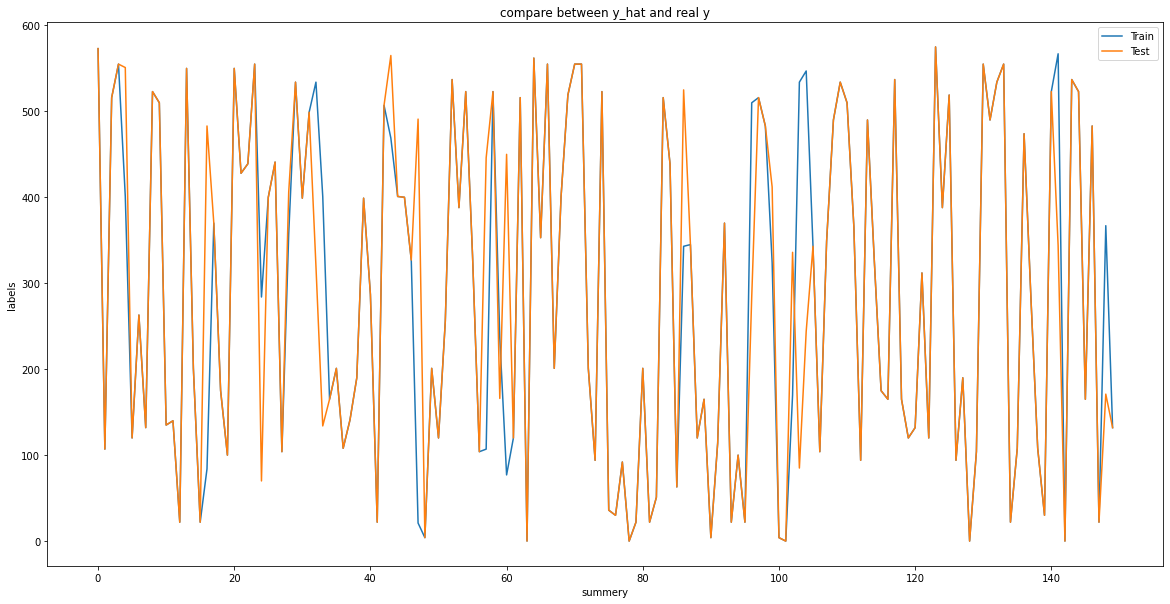

In [19]:
# Plot train vs test accuracy per epoch
plt.figure(figsize=(20, 10))
# Use the history metrics
plt.plot(testing_y_hat[:150])
plt.plot(y_test[:150])

# Make it pretty
plt.title('compare between y_hat and real y')
plt.ylabel('labels')
plt.xlabel('summery')
plt.legend(['Train', 'Test'])
plt.show()

<h2>Classification based on classes as a label </h2> 

<h3>Split data into training and testing </h3> 

In [20]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_Classes, test_size=0.45, random_state=1)

<h3>build and fit LinearSVC model </h3> 

In [21]:
model2 =LinearSVC()
history2=model2.fit(X_train2,y_train2)
print("training data accu : ",round(model2.score(X_train2,y_train2)*100,2),"%")
print("Testing data accu: ",round(model2.score(X_test2,y_test2)*100,2),"%")

training data accu :  95.71 %
Testing data accu:  74.01 %


<h3>Predict and calculate mean square error</h3> 

In [22]:
training_y_hat2=model2.predict(X_train2)
testing_y_hat2=model2.predict(X_test2)
print("MSE on training data: ",mean_squared_error(y_train2,training_y_hat2))
print("MSE on testing data: ",mean_squared_error(y_test2,testing_y_hat2))

MSE on training data:  632.0841813135985
MSE on testing data:  3066.5969868173256


<h3>visualize some of predicted data</h3> 

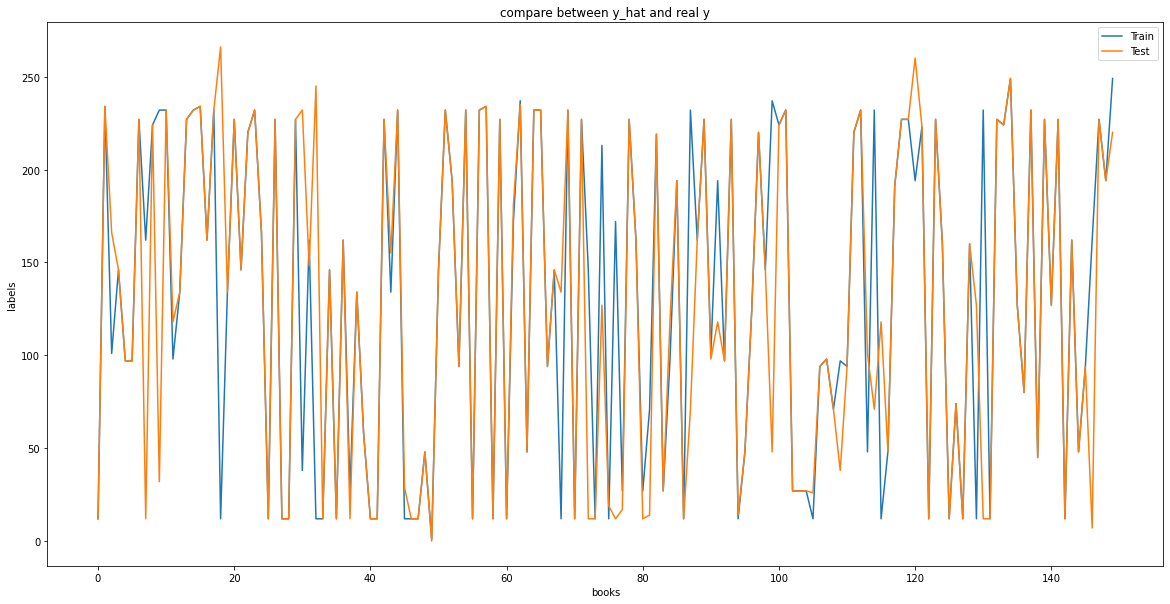

In [23]:
# Plot train vs test accuracy per epoch
plt.figure(figsize=(20, 10))
# Use the history metrics
plt.plot(testing_y_hat2[:150])
plt.plot(y_test2[:150])

# Make it pretty
plt.title('compare between y_hat and real y')
plt.ylabel('labels')
plt.xlabel('books')
plt.legend(['Train', 'Test'])
plt.show()